# Mobility and Geospatial Data for Health Solutions in Africa


## OBJECTIVE: Prediction of Next Optimum location for siting health facility in Nigeria

Nigeria is ranked the seventh most populated country in the world and the most populated in Africa. With an estimated population of over 196 million populations at july 30 2018 in need of healthcare, Nigeria is yet to deliver adequate healthcare services for all the people. 
The high cost for treatment and inability to access healthcare has contributed signifi-cantly to the high level of poverty in the lives of the people, On the average, 2018 under-five mortality rate is estimated at 100 per 1,000 live births against the Sustainable Development Goals (SDGs) global target of 25 per 1,000 live births, and infant mortality rate is estimated at 65 per 1,000 live births
Healthcare facilities in Nigeria are mainly classified into primary, secondary and tertiary facilities. Research shows that out of a total of 34,423 Healthcare facilities' in Nigeria, the Primary Healthcare facilities account for 88% while the secondary facilities are 12% and tertiary facilities are 0.25%.

According to UNICEF 844,321 deaths are recorded in nigeria caused by conflicts. This notebook will deal with conflict in nigeria with the correlation with health facility and best location for the next health facility that will reduce this particular death rate reasonably.


In [2]:
# importing my libaries
import numpy as np
import math
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from arcgis.gis import GIS
gis = GIS("home")
import warnings
warnings.filterwarnings("ignore")

### importing nigeria health sites in the map

In [2]:
# show map view for healthsite
nigeria_map = gis.map("Nigeria", zoomlevel=8)
nigeria_map

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"Nigeria Health Facilities" type:Feature Layer Collection owner:oseghalepatrick>
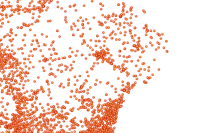

In [2]:
# Item Added From Toolbar
# Title: Nigeria Health Facilities | Type: Feature Service | Owner: oseghalepatrick
nga_health_facilities = gis.content.get("4941f766b6b34c9f8e200d9db0106fed")
nga_health_facilities

In [3]:
# bring out the layer of my map 
nga_health_facilities_layer = nga_health_facilities.layers[0]
nga_health_facilities_sdf = nga_health_facilities_layer.query().sdf
nga_health_facilities_sdf.head()

,FID,id,name,global_id,alternate_,functional,type,ward_code,category,timestamp,accessibil,lga_name,lga_code,state_code,state_name,FID_1,SHAPE
0,1,1,G R A Nursing Home,af719462-abfd-4f47-9dc3-0987164e75ac,Nursing Home,Unknown,Primary,12413,Primary Health Center,2020-07-04T13:49:18Z,,Maiduguri,124,BR,Borno,sv_health_facilities.fid--3185df38_17a314b4ee6...,"{""x"": 1463664.2871721964, ""y"": 1325493.9102898..."
1,2,2,Gishili Health Center,a29b0328-d844-4358-b0ab-2e120b8fb30f,Nursing Home,Functional,Primary,12413,Primary Health Center,2020-07-04T13:49:18Z,Unknown,Maiduguri,124,BR,Borno,sv_health_facilities.fid--3185df38_17a314b4ee6...,"{""x"": 1463536.9496645522, ""y"": 1325413.6814141..."
2,3,3,Lehobi Primary Health Care,b685b769-5c83-4f83-a182-00e7e1b777d8,,Partially Functional,Primary,10207,Primary Health Center,2020-07-04T13:49:18Z,,Askira Uba,102,BR,Borno,sv_health_facilities.fid--3185df38_17a314b4ee6...,"{""x"": 1426702.2287794878, ""y"": 1198906.5303471..."
3,4,4,Dugja Idp Camp,78e64f7a-cbb8-4357-9e64-a7e502534527,Mandara Girau Dispensary,Not Functional,Primary,10503,Primary Health Center,2020-07-04T13:49:18Z,Unknown,Biu,105,BR,Borno,sv_health_facilities.fid--3185df38_17a314b4ee6...,"{""x"": 1356052.6627285155, ""y"": 1188499.7148036..."
4,5,5,Kopa Maikudiri Dispensary,409c97ce-7490-4dc2-a8f8-2b8d53ad2b12,,Partially Functional,Primary,10209,Dispensary,2020-07-04T13:49:18Z,Unknown,Askira Uba,102,BR,Borno,sv_health_facilities.fid--3185df38_17a314b4ee6...,"{""x"": 1482036.2700439868, ""y"": 1204847.4370435..."


In [ ]:
# plotting the health facilties are on our map
nga_health_facilities_sdf.spatial.plot(map_widget=nigeria_map,
                        renderer_type='s',
                        symbol_type='simple',
                        symbol_style='d', # d - for diamonds
                        colors='Reds_r',
                        marker_size=5)

In [5]:
nga_health_facilities_sdf.columns

Index(['FID', 'id', 'name', 'global_id', 'alternate_', 'functional', 'type',
       'ward_code', 'category', 'timestamp', 'accessibil', 'lga_name',
       'lga_code', 'state_code', 'state_name', 'FID_1', 'SHAPE'],
      dtype='object')

In [55]:
# number of health facilties
count_health_facilities = nga_health_facilities_sdf\
                .groupby(['state_name'], as_index=False)\
                .agg(count_health_facilities=('state_name',np.count_nonzero))
count_health_facilities.head()

,state_name,count_health_facilities
0,Abia,1218
1,Adamawa,1575
2,Akwa Ibom,870
3,Anambra,1648
4,Bauchi,1331


<AxesSubplot:title={'center':'number of health site'}, xlabel='count_health_facilities', ylabel='state_name'>

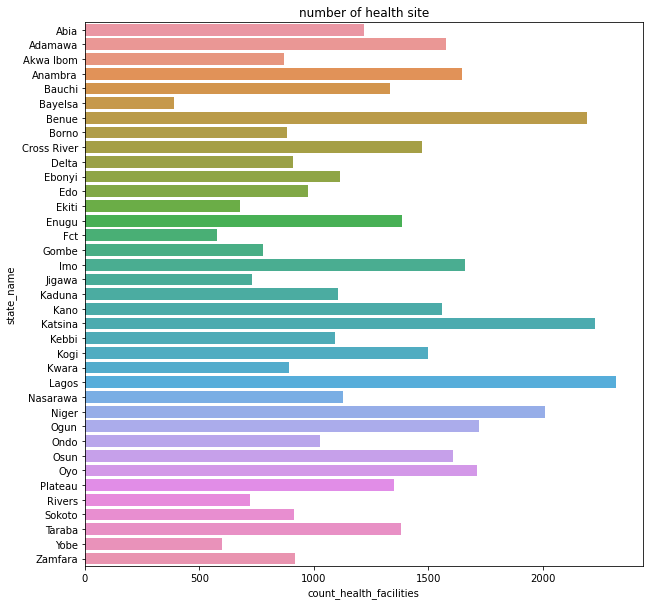

In [56]:
# plotting the number of health site
plt.figure(figsize=(10,10))
plt.title('number of health site')
sns.barplot(x='count_health_facilities', y='state_name', data=count_health_facilities)

*from the graph we can see that the state with the highest health site is lagos and the lowest is bayelsa*

### importing nigeria conflict in the map

In [8]:
# show map view for conflict
nga_map = gis.map("Nigeria", zoomlevel=8)
nga_map

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"Nigeria conflict data" type:Feature Layer Collection owner:oseghalepatrick>
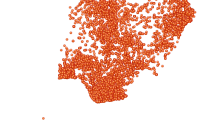

In [4]:
# Item Added From Toolbar
# Title: Nigeria conflict data | Type: Feature Service | Owner: oseghalepatrick
nga_conflict_data = gis.content.get("32c2c608253947259f976e60a85daad1")
nga_conflict_data

In [58]:
# bring out the layer of my map 
nga_conflict_data_layer = nga_conflict_data.layers[0]
nga_conflict_data_sdf = nga_conflict_data_layer.query().sdf
nga_conflict_data_sdf.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,ObjectId,SHAPE
0,566,NIG1,1,1997-01-07,1997,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Nigeria),None,...,6.453,3.396,1,AFP,International,A blast believed to have been caused by a bomb...,2,1582579226,1,"{""x"": 378040.99073395703, ""y"": 719868.16479045..."
1,566,NIG2,2,1997-01-08,1997,2,Battles,Armed clash,Ekori Ethnic Militia (Nigeria),None,...,5.809,8.081,2,AFP,International,At least 20 people including a police sergeant...,1,1582579226,2,"{""x"": 899572.8051004435, ""y"": 647765.622022613..."
2,566,NIG3,3,1997-01-09,1997,1,Battles,Armed clash,Ekori Ethnic Militia (Nigeria),None,...,7.802,6.743,3,AFP,International,three people were killed in a revenge attack d...,3,1582579226,3,"{""x"": 750627.3264190437, ""y"": 871211.238776102..."
3,566,NIG4,4,1997-01-10,1997,1,Battles,Armed clash,Ijaw Ethnic Militia (Nigeria),None,...,4.833,6.000,2,Reuters,International,The body of one of four soldiers gone missing ...,1,1582579226,4,"{""x"": 667916.9447596414, ""y"": 538646.242711464..."
4,566,NIG5,5,1997-01-10,1997,1,Battles,Armed clash,Ijaw Ethnic Militia (Nigeria),None,...,5.517,5.750,1,Reuters,International,Three are killed in a battle between militant ...,3,1651165023,5,"{""x"": 640087.0720613231, ""y"": 615100.874553927..."


In [ ]:
# plotting the health facilties are on our map
nga_conflict_data_sdf.spatial.plot(map_widget=nga_map,
                        renderer_type='s',
                        symbol_type='simple',
                        symbol_style='d', # d - for diamonds
                        colors='Reds_r',
                        marker_size=5)

for this conflict data it will be good to use a current data as some conflict might have been solved by the government in the past but we need the precising need. So we will be using the sum of 2022 fatalities to know where the problem is presently 

In [59]:
# filtering only 2022 conflict data
nga_conflict_data_sdf = nga_conflict_data_layer.query(where="EVENT_DATE>'2021-12-31'").sdf
nga_conflict_data_sdf.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP,ObjectId,SHAPE
0,566,NIG23470,23470,2022-01-29,2022,1,Battles,Armed clash,Military Forces of Nigeria (2015-),None,...,13.098,12.495,2,Nigeria Punch,National,"On 29 January 2022, Nigerian troops on patrol ...",0,1644252032,24001,"{""x"": 1390937.037461953, ""y"": 1470930.75829477..."
1,566,NIG23199,23199,2022-01-09,2022,1,Battles,Armed clash,Unidentified Armed Group (Nigeria),None,...,6.616,5.984,2,Daily Trust (Nigeria); Sun (Nigeria),National,"On 9 January 2022, police forces clashed with ...",1,1642439768,24002,"{""x"": 666135.8329069491, ""y"": 738131.898202695..."
2,566,NIG23575,23575,2022-02-04,2022,3,Strategic developments,Agreement,Islamic State (West Africa) - Lake Chad Factio...,None,...,11.747,11.961,3,Daily Independent (Nigeria),National,Around 4 February 2022 (between 21 January - 1...,0,1647284180,24003,"{""x"": 1331492.4293783451, ""y"": 1316928.7909021..."
3,566,NIG24046,24046,2022-02-17,2022,1,Violence against civilians,Abduction/forced disappearance,Unidentified Armed Group (Nigeria),None,...,7.150,3.350,2,Blueprint,National,"On 17 February 2022, a group kidnapped a woman...",0,1647888806,24004,"{""x"": 372920.29415746644, ""y"": 798008.26002598..."
4,566,NIG23545,23545,2022-01-29,2022,1,Protests,Peaceful protest,Protesters (Nigeria),Labour Group (Nigeria),...,6.145,6.788,1,Nigeria Punch,National,"On 29 January 2022, some traders and apprentic...",0,1644252032,24005,"{""x"": 755636.7035047411, ""y"": 685373.470401353..."


In [12]:
nga_conflict_data_sdf.columns

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP', 'ObjectId',
       'SHAPE'],
      dtype='object')

In [60]:
#to get the state that the conflict happened 
nga_conflict_data_sdf['ADMIN1'].head()

0      Borno
1        Edo
2       Yobe
3       Ogun
4    Anambra
Name: ADMIN1, dtype: object

In [61]:
# sum of fatalities in 2022
sum_fatalities = nga_conflict_data_sdf\
                .groupby(['ADMIN1'], as_index=False)\
                .agg(sum_fatalities=('FATALITIES',np.sum))
sum_fatalities.head()

,ADMIN1,sum_fatalities
0,Abia,81
1,Adamawa,39
2,Akwa Ibom,20
3,Anambra,232
4,Bauchi,26


<AxesSubplot:title={'center':'sum of fatalities'}, xlabel='sum_fatalities', ylabel='ADMIN1'>

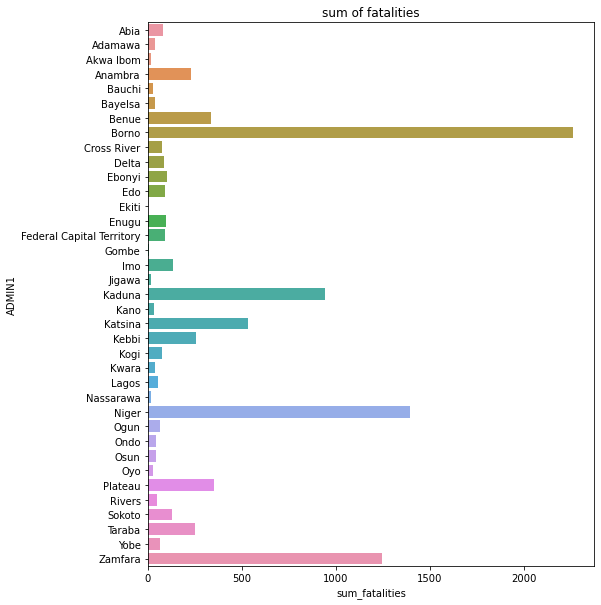

In [62]:
# plotting the sum of fatalities in each state 
plt.figure(figsize=(8,10))
plt.title('sum of fatalities')
sns.barplot(x='sum_fatalities', y='ADMIN1', data=sum_fatalities)

*from the chart we can see that the most fatalities caused by conflict was in borno followed by niger*

### importing facebook nigeria movement range mobility data 

<Item title:"nigeria_movement_range" type:Feature Layer Collection owner:chinazo9>
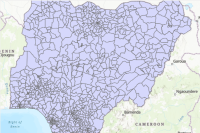

In [5]:
# Item Added From Toolbar
# Title: nigeria_movement_range | Type: Feature Service | Owner: chinazo9
nga_mrange = gis.content.get("6efec7333f5f4f7ab10aa3461da241c2")
nga_mrange

In [8]:
nga_mrange.layers[0]

<FeatureLayer url:"https://services8.arcgis.com/oTalEaSXAuyNT7xf/arcgis/rest/services/nigeria_movement_range/FeatureServer/4">

In [9]:
# changing my layers to dataframe
nga_mrange_layer = nga_mrange.layers[0]
nga_mrange_sdf = nga_mrange_layer.query().sdf
nga_mrange_sdf.head()

,OBJECTID_1,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,...,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_rela,all_day_ratio_single_tile_users,baseline_name,baseline_type,Shape__Area,Shape__Length,SHAPE
0,1,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.14142,0.18875,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
1,2,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.06848,0.24061,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
2,3,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.08961,0.19216,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
3,4,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.03200,0.14457,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."
4,5,NGA,Nigeria,NGA.1_1,Abia,,NGA.1.1_1,Aba North,,,...,GADM,NGA.1.1_1,Aba North,-0.15844,0.14010,full_february,DAY_OF_WEEK,0.001471,0.28777,"{""rings"": [[[7.37960720051194, 5.0596637728648..."


for this analysis it will be very useless to use the whole movement range of all time, because we want to solve a precising and current need we will be using the current movement range wish is the 2022 movement range to get a more specified range   

#### Exploratory data analysis for nigeria movement range

for this analysis it will be very useless to use the whole movement range of all time, because we want to solve a precising and current need we will be using the current movement range wish is the 2022 movement range to get a more specified range

In [ ]:
# filtering only 2022 movement range
nga_mrange_sdf = nga_mrange_layer.query(where="ds>'2021-12-31'").sdf
nga_mrange_sdf.head()

In [6]:
def average_occurence(data, state_code, state_name, target):
    """ This average will help you get the addition of all target in
    groupby the state name and code that are in the particular dataset 
    you are working with """
    data\
        .groupby([state_code, state_name], as_index=False)\
        .agg(avg_mobility_change=(target,np.mean))

In [ ]:
# Average movement range for 2022
avg_mobility = nga_mrange_sdf\
                .groupby(['NAME_1'], as_index=False)\
                .agg(avg_mobility_change=('all_day_bing_tiles_visited_rela',np.mean))
avg_mobility.head()

<AxesSubplot:title={'center':'avg_mobility_change'}, xlabel='avg_mobility_change', ylabel='NAME_1'>

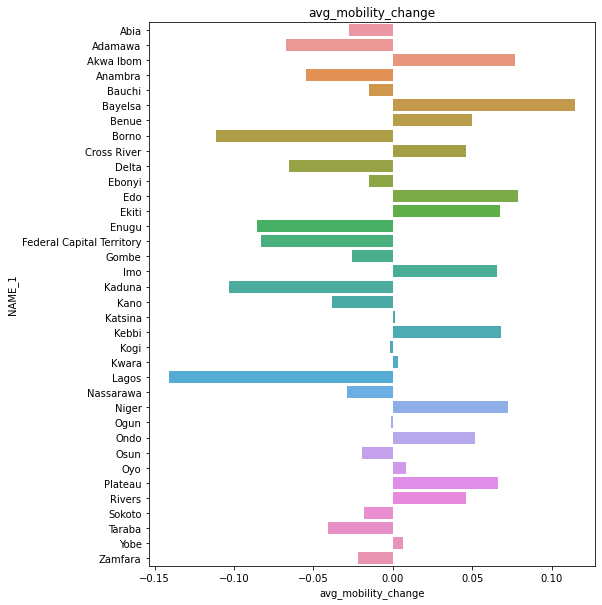

In [65]:
# plotting the avg_mobility_change 
plt.figure(figsize=(8,10))
plt.title('avg_mobility_change')
sns.barplot(x='avg_mobility_change', y='NAME_1', data=avg_mobility)

    from the bar chart we can see that there is more people moving into EDO and more leaving LAGOS additionaly. We see the very high volume of movement       out of lagos from research we denote that it is as a result of people traveling to other country therefore it is an outlier. However the outlier will     not affect our end result because what we needed is the state with high immigrant not emmigrant. 
    we don't know the main reason for this movement but our aim is to get movement related to conflict. 

### Analysis Preparation

In this analysis we want to get the state and the location which have high fatalities compare to there health facilities, combine with the one that have the highest immigrant. This will help use to know a state which more people will be prone to damage cause by conflict with lesser facilities to care for those damage 

In [66]:
def merge(data1,data2,column1,column2):
    
    """this function will help you to combine two table together
    and delete the similar column where: 
    * data1 is the name of the first table 
    * data2 is the name of the second table
    * column1 is the name of the column to join in data1
    * column2 is the name of the column to join in data2
    """
    
    name = data1.merge(data2, left_on = column1, right_on = column2)
    name = name.drop(column2, axis = 1)
    return name

In [67]:
# combining the table together for further analysis 
best_health_conflict = merge(count_health_facilities, sum_fatalities , 'state_name' , 'ADMIN1')
best_health_conflict.head()


,state_name,count_health_facilities,sum_fatalities
0,Abia,1218,81
1,Adamawa,1575,39
2,Akwa Ibom,870,20
3,Anambra,1648,232
4,Bauchi,1331,26


In [68]:
#combining all determinant variables together
best_site = merge(best_health_conflict, avg_mobility, 'state_name', 'NAME_1')
best_site.head()

,state_name,count_health_facilities,sum_fatalities,avg_mobility_change
0,Abia,1218,81,-0.027784
1,Adamawa,1575,39,-0.067202
2,Akwa Ibom,870,20,0.076802
3,Anambra,1648,232,-0.054996
4,Bauchi,1331,26,-0.014777


In [69]:
# deriving the determinant variable of the site
fatalities_health_ratio = best_site['sum_fatalities']/best_site['count_health_facilities']
best_site['fatalities_health_ratio'] = fatalities_health_ratio
best_site.head()

,state_name,count_health_facilities,sum_fatalities,avg_mobility_change,fatalities_health_ratio
0,Abia,1218,81,-0.027784,0.066502
1,Adamawa,1575,39,-0.067202,0.024762
2,Akwa Ibom,870,20,0.076802,0.022989
3,Anambra,1648,232,-0.054996,0.140777
4,Bauchi,1331,26,-0.014777,0.019534


<AxesSubplot:title={'center':'best_site'}, xlabel='fatalities_health_ratio', ylabel='state_name'>

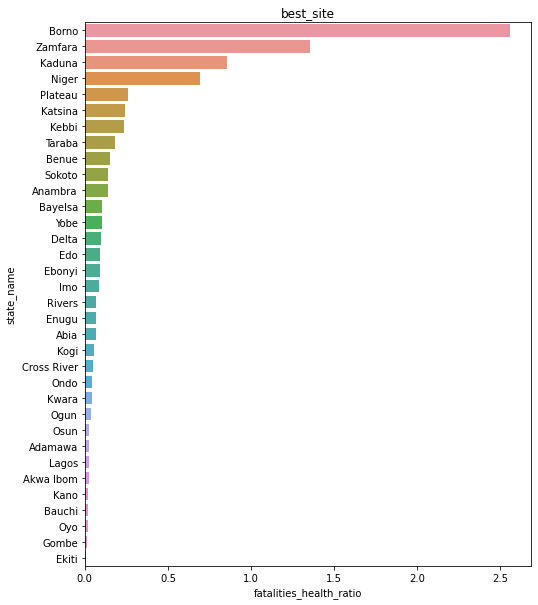

In [70]:
# plotting the avg_mobility_change 
best_site = best_site.sort_values(by='fatalities_health_ratio', ascending = 0)
plt.figure(figsize=(8,10))
plt.title('best_site')
sns.barplot(x='fatalities_health_ratio', y='state_name', data=best_site)

From the graph we can denote that the fatalities by conflict compare to the health care is very high in BORNO but we are not done yet. now we don't know if alot of people will be moving out of BORNO because of this fatalities or more people are coming to borno despite the fatalities. now we will add the avg_mobility data with the fatalities_health_ratio to get the location that people are coming into and there are more fatalities with low facility this will be our best state for siting the next hospital 

In [71]:
mobility_to_fatalities = best_site['fatalities_health_ratio'] + best_site['avg_mobility_change']
best_site['mobility_to_fatalities'] = mobility_to_fatalities
best_site.head()


,state_name,count_health_facilities,sum_fatalities,avg_mobility_change,fatalities_health_ratio,mobility_to_fatalities
7,Borno,884,2262,-0.111253,2.558824,2.447570
33,Zamfara,916,1244,-0.021879,1.358079,1.336199
16,Kaduna,1103,941,-0.103014,0.853128,0.750114
23,Niger,2010,1394,0.072700,0.693532,0.766233
28,Plateau,1348,354,0.066191,0.262611,0.328802


<AxesSubplot:title={'center':'best_site'}, xlabel='move_fatalities', ylabel='state_name'>

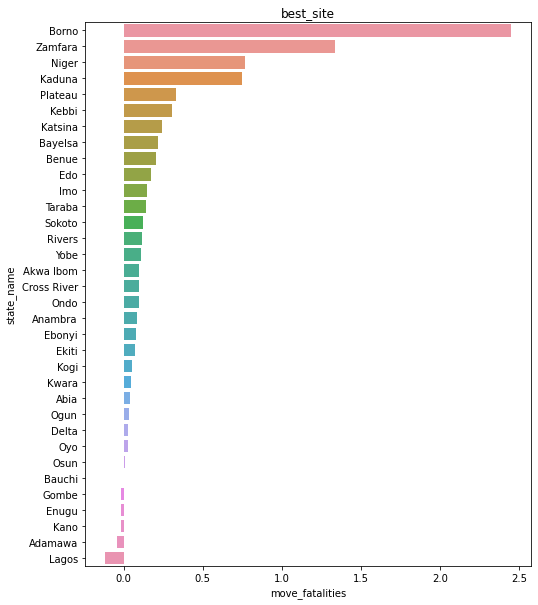

In [91]:
best_site = best_site.sort_values(by='mobility_to_fatalities', ascending = 0)
plt.figure(figsize=(8,10))
plt.title('best_site')
sns.barplot(x='mobility_to_fatalities', y='state_name', data=best_site)

#### Now we can boldly say the best state to site the next health facility is BORNO

### Borno map anaylsis

<Item title:"Centroids_location_for_Conflict_per_Admin_Boundary_Nigeria" type:Feature Layer Collection owner:seyiogunmusire>
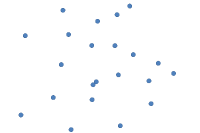

In [3]:
# Item Added From Toolbar
# Title: Centroids_location_for_Conflict_per_Admin_Boundary_Nigeria | Type: Feature Service | Owner: seyiogunmusire
centriod = gis.content.get("06713586f90745179e5debcd9c42bc15")
centriod

In [4]:
# bring out the layer of my map 
centriod_layer = centriod.layers[0]
centriod_sdf = centriod_layer.query().sdf
centriod_sdf.head()

,OBJECTID,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,sum_fatalities,Point_Count,AnalysisArea,ORIG_FID,SHAPE
0,1,NGA.8.22_1,NGA,Nigeria,NGA.8_1,Borno,NA,Maiduguri,NA,NA,Local Authority,Local Authority,NA,NA,68.0,17,130.717840,92,"{""x"": 13.19961511200006, ""y"": 11.8527520880000..."
1,2,NGA.8.26_1,NGA,Nigeria,NGA.8_1,Borno,NA,Ngala,NA,NA,Local Authority,Local Authority,NA,NA,121.0,7,1335.337005,480,"{""x"": 14.273565361000067, ""y"": 12.199324165000..."
2,3,NGA.8.13_1,NGA,Nigeria,NGA.8_1,Borno,NA,Jere,NA,NA,Local Authority,Local Authority,NA,NA,4.0,1,870.432703,538,"{""x"": 13.25051568200007, ""y"": 11.9022930040000..."
3,4,NGA.8.25_1,NGA,Nigeria,NGA.8_1,Borno,NA,Monguno,NA,NA,Local Authority,Local Authority,NA,NA,0.0,0,1509.217329,548,"{""x"": 13.558108384000036, ""y"": 12.484642727000..."
4,5,NGA.8.8_1,NGA,Nigeria,NGA.8_1,Borno,NA,Dikwa,NA,NA,Local Authority,Local Authority,NA,NA,0.0,0,1784.363297,564,"{""x"": 14.12030326200005, ""y"": 11.9144795120000..."


In [5]:
# show map view for 
borno_map = gis.map('Borno, Nigeria', zoomlevel=9)
borno_map

MapView(layout=Layout(height='400px', width='100%'))

now let show the map and the predicted next health site

In [6]:
centriod_sdf.columns

Index(['OBJECTID', 'GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1',
       'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2',
       'HASC_2', 'sum_fatalities', 'Point_Count', 'AnalysisArea', 'ORIG_FID',
       'SHAPE'],
      dtype='object')

In [7]:
centriod_sdf.spatial.plot(map_widget=borno_map,
                        marker_size=5)

True

    Now I have done different analysis on the map that i use to get the centriod that covers the highest number of point and count this point to get the best town

<Item title:"Summarize_Nearest_analysis3" type:Feature Layer Collection owner:seyiogunmusire>
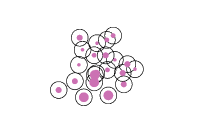

In [10]:
# the summary statictics of the highest
borno_best = gis.content.get("035d9f1878454298bec76d2123e69a02")
borno_best

In [11]:
borno_best_layer = borno_best.layers[0]
borno_best_sdf = borno_best_layer.query().sdf
borno_best_sdf.head()

,OBJECTID,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,...,CC_2,HASC_2,sum_fatalities,Point_Count,AnalysisArea,ORIG_FID_1,BUFF_DIST,sum_Length_Kilometers,Polyline_Count,SHAPE
0,1,NGA.8.22_1,NGA,Nigeria,NGA.8_1,Borno,NA,Maiduguri,NA,NA,...,NA,NA,68.0,17,2826.218382,1,30.0,10302.034160,1163,"{""rings"": [[[13.1996151120001, 12.123945392000..."
1,2,NGA.8.26_1,NGA,Nigeria,NGA.8_1,Borno,NA,Ngala,NA,NA,...,NA,NA,121.0,7,2826.218382,2,30.0,4116.272637,232,"{""rings"": [[[14.2735653610001, 12.470510683], ..."
2,3,NGA.8.13_1,NGA,Nigeria,NGA.8_1,Borno,NA,Jere,NA,NA,...,NA,NA,4.0,1,2826.218381,3,30.0,7209.329035,1020,"{""rings"": [[[13.2505156820001, 12.173485349], ..."
3,4,NGA.8.25_1,NGA,Nigeria,NGA.8_1,Borno,NA,Monguno,NA,NA,...,NA,NA,0.0,0,2826.218382,4,30.0,3528.138229,176,"{""rings"": [[[13.558108384, 12.7558235220001], ..."
4,5,NGA.8.8_1,NGA,Nigeria,NGA.8_1,Borno,NA,Dikwa,NA,NA,...,NA,NA,0.0,0,2826.218382,5,30.0,3638.659474,206,"{""rings"": [[[14.120303262, 12.185671621], [14...."


In [12]:
borno_best_sdf.columns

Index(['OBJECTID', 'GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1',
       'NAME_2', 'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2',
       'HASC_2', 'sum_fatalities', 'Point_Count', 'AnalysisArea', 'ORIG_FID_1',
       'BUFF_DIST', 'sum_Length_Kilometers', 'Polyline_Count', 'SHAPE'],
      dtype='object')

In [14]:
borno_best_sdf['NAME_2']

0      Maiduguri
1          Ngala
2           Jere
3        Monguno
4          Dikwa
5     Kala/Balge
6          Gwoza
7          Gubio
8           Kaga
9          Marte
10       Nganzai
11      Guzamala
12         Gujba
13          Mafa
14        Kukawa
15        Mobbar
16      Magumeri
17          Bama
18        Damboa
19     Lake Chad
20       Konduga
Name: NAME_2, dtype: object

In [17]:
borno_best_sdf[['NAME_2','Point_Count','Polyline_Count']].head()

,NAME_2,Point_Count,Polyline_Count
0,Maiduguri,17,1163
1,Ngala,7,232
2,Jere,1,1020
3,Monguno,0,176
4,Dikwa,0,206


<AxesSubplot:title={'center':'best location in borno'}, xlabel='Point_Count', ylabel='NAME_2'>

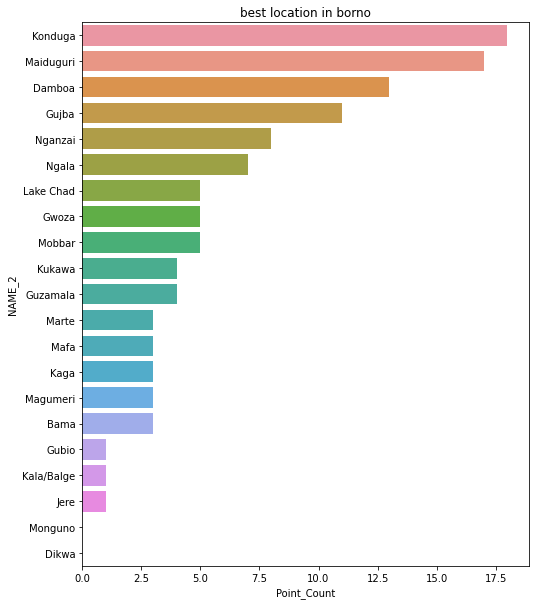

In [22]:
best_borno = borno_best_sdf.sort_values(by='Point_Count', ascending = 0)
plt.figure(figsize=(8,10))
plt.title('best location in borno')
sns.barplot(x='Point_Count', y='NAME_2', data=best_borno)

### From this we can boldly say the best optimum site for siting health facility concerning conflict in nigeria is KONDUGA